# `K-Means Clustering` from Scratch

In [1]:
from sklearn.datasets import make_blobs
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [110]:
centroids = [(-7, 2), (1, 9), (-1, -2), (6, 6)]
cluster_std = [1.1, 1, 1.1, 1]
X, y = make_blobs(n_samples=300, cluster_std=cluster_std, centers=centroids, n_features=2)

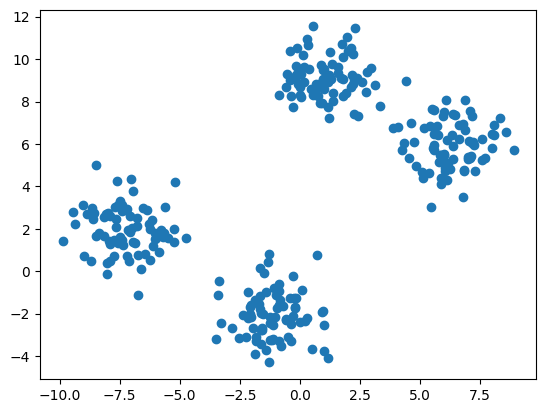

In [111]:
plt.scatter(X[:,0], X[:,1])
plt.show()

In [112]:
import random

class My_kMeans:
    def __init__(self, n_clusters, max_iter=100):
        self.n_clusters = n_clusters
        self.max_iterations = max_iter
        self.centroids = None
        
    def fit_predict(self, X):
        # init n_clusters centroids
        random_index = random.sample(range(0, X.shape[0]), self.n_clusters)
        self.centroids = X[random_index]
        
        for i in range(self.max_iterations):
            # 1. assign clusters to every point
            clusters_group = self.assign_clusters(X)
            old_centroids = self.centroids
            # 2. move centroids
            self.centroids = self.move_centroids(X, clusters_group)
            # 3. check finish
            if np.allclose(old_centroids, self.centroids):
                break
        
        return clusters_group



    def move_centroids(self, X, clusters_group):
        new_centroids = []
        cluster_type = np.unique(clusters_group)
        for type in cluster_type:
            new_centroids.append(X[clusters_group == type].mean(axis=0))
            
        return np.array(new_centroids)

    
    
    def assign_clusters(self, X):
        clusters_group = []
        distances = []
        
        for row in X:
            for centroid in self.centroids:
                distances.append(np.sqrt(np.dot(row-centroid,row-centroid)))
            min_distance = min(distances)
            index_pos = distances.index(min_distance)
            clusters_group.append(index_pos)
            distances.clear()
        return np.array(clusters_group)

In [125]:
n_clust = 8
kmc = My_kMeans(n_clusters=n_clust)

In [126]:
clusters = kmc.fit_predict(X)

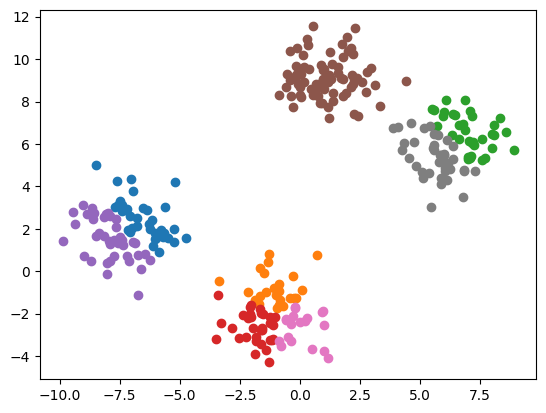

In [127]:
for i in range(0, n_clust):
    plt.scatter(X[clusters == i, 0], X[clusters == i, 1])

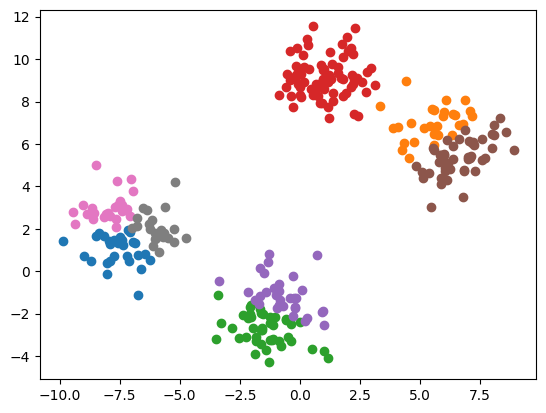

In [128]:
from sklearn.cluster import KMeans
k = KMeans(n_clusters=n_clust)
clusters = k.fit_predict(X)
for i in range(0, n_clust):
    plt.scatter(X[clusters == i, 0], X[clusters == i, 1])